In [1]:
__publisher__ = 'Global Green Growth Institute'
__author__ = 'GGPM Team'
__model_lead__ = 'H. Luchtenbelt'
__programmer__ = 'S. Zabrocki'
__status__ = 'Pending Validation'

"""
TO DO.
"""

import pandas as pd
import numpy as np
import os
from graphmodels.graphmodel import GraphModel

In [2]:
GE = pd.read_csv('models/Hermen/data/GE.csv').dropna(subset=['GGI_code'])
GP = pd.read_csv('models/Hermen/data/GP.csv').dropna(subset=['GGI_code'])
GM = pd.read_csv('models/Hermen/data/GM.csv').dropna(subset=['GGI_code'])

In [3]:
GP.GGI_code.unique()

array([' TM_LPi', ' E_Li_Baseline'], dtype=object)

In [4]:
GM.GGI_code.unique()

array(['TM_Ti', ' E_TCH4i_baseline', ' E_Ti_baseline'], dtype=object)

In [5]:
GE.GGI_code.unique()

array([' EECH4'], dtype=object)

In [6]:
 pd.read_csv('models/Hermen/data/QA.csv')#.dropna(subset=['GGI_code'])

,Area,Item,Element,Year,Unit,Value,FBS_item,Unnamed: 2,GGI_code
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0,"Meat, Other",NaN,NaN
1,Afghanistan,Asses,Stocks,1962,Head,851850.0,"Meat, Other",NaN,NaN
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0,"Meat, Other",NaN,NaN
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0,"Meat, Other",NaN,NaN
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0,"Meat, Other",NaN,NaN
...,...,...,...,...,...,...,...,...,...
131567,Zimbabwe,Sheep and Goats,Stocks,2015,Head,4506155.0,Mutton & Goat Meat,NaN,NaN
131568,Zimbabwe,Sheep and Goats,Stocks,2016,Head,3898269.0,Mutton & Goat Meat,NaN,NaN
131569,Zimbabwe,Sheep and Goats,Stocks,2017,Head,5042631.0,Mutton & Goat Meat,NaN,NaN
131570,Zimbabwe,Sheep and Goats,Stocks,2018,Head,5180853.0,Mutton & Goat Meat,NaN,NaN


In [7]:
 pd.read_csv('models/Hermen/data/GY.csv')#.dropna(subset=['GGI_code'])

,Area,Item,Element,Year,Unit,Value,Note
0,Afghanistan,Nutrient nitrogen N (total),Agricultural Use in nutrients,1961,kg of nutrients,1000000.0000,NaN
1,Afghanistan,Nutrient nitrogen N (total),Agricultural Use in nutrients,1962,kg of nutrients,1000000.0000,NaN
2,Afghanistan,Nutrient nitrogen N (total),Agricultural Use in nutrients,1963,kg of nutrients,1000000.0000,NaN
3,Afghanistan,Nutrient nitrogen N (total),Agricultural Use in nutrients,1964,kg of nutrients,1000000.0000,NaN
4,Afghanistan,Nutrient nitrogen N (total),Agricultural Use in nutrients,1965,kg of nutrients,1000000.0000,NaN
...,...,...,...,...,...,...,...
103665,Zimbabwe,Nutrient nitrogen N (total),Emissions (CO2eq) (Synthetic fertilizers),2016,gigagrams,375.0147,NaN
103666,Zimbabwe,Nutrient nitrogen N (total),Emissions (CO2eq) (Synthetic fertilizers),2017,gigagrams,419.5518,NaN
103667,Zimbabwe,Nutrient nitrogen N (total),Emissions (CO2eq) (Synthetic fertilizers),2018,gigagrams,419.5518,NaN
103668,Zimbabwe,Nutrient nitrogen N (total),Emissions (CO2eq) (Synthetic fertilizers),2030,gigagrams,676.8362,NaN


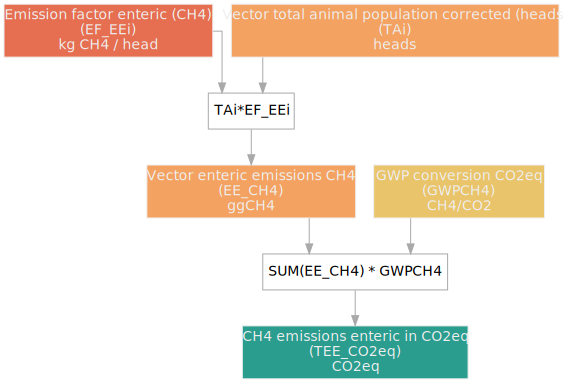

In [8]:
TEE_CO2eq_nodes = [
    {'type': 'input',
     'unit': 'kg CH4 / head',
     'id': 'EF_EEi',
     'name': 'Emission factor enteric (CH4)',
     },

    {'type': 'variable',
     'unit': 'heads',
     'id': 'TAi',
     'name': 'Vector total animal population corrected (heads)',
     },


    {'type': 'variable',
     'unit': 'ggCH4',
     'id': 'EE_CH4',
     'name': 'Vector enteric emissions CH4',
     'in': ['TAi', 'EF_EEi'],
     'computation': {'name': 'TAi*EF_EEi',
                     'formula': lambda X: X['TAi']*X['EF_EEi']}
     },
    {'type': 'parameter',
     'unit': 'CH4/CO2',
     'id': 'GWPCH4',
     'name': 'GWP conversion CO2eq',
     },

    {'type': 'output',
     'unit': 'CO2eq',
     'id': 'TEE_CO2eq',
     'name': 'CH4 emissions enteric in CO2eq',
     'in': ['GWPCH4', 'EE_CH4'],
     'computation': {'name': 'SUM(EE_CH4) * GWPCH4 ',
                     'formula': lambda X: sum(X['EE_CH4']) * X['GWPCH4']}
     },


]


TEE_CO2eq_model = GraphModel(TEE_CO2eq_nodes)




TEE_CO2eq_model.draw()


In [ ]:
FE_CO2eq_nodes = [
    {'type': 'input',
     'id': 'CL_total',
     'name': 'Cropland (including perm. and fallow land)',
     'unit': 'x 1000ha',
     },
    {'type': 'input',
     'unit': 'kg/ha',
     'id': 'FU',
     'name': 'Fertilizer use / ha',
    },
    {'type': 'variable',
     'unit': 'kgN',
     'id': 'IN_F',
     'name': 'Fertilizer input',
     'in': ['CL_total', 'FU'],
     'computation': {'name': 'CL_total * FU',
                     'formula': lambda X: X['CL_total'] * X['FU']}
     },
    {'type': 'parameter',
     'unit': 'kg N2O-N/kg N',
     'id': 'EF_F',
     'name': 'Emission factor N2O from fertilizer',
     },
    {'type': 'variable',
     'unit': 'gg N2O',
     'id': 'F_N2O',
     'name': 'N2O emissions from fertilizer use',
     'in': ['IN_F', 'EF_F'],
     'computation': {'name': 'IN_F * EF_F',
                     'formula': lambda X: X['IN_F'] * X['EF_F']}
     },
    {'type': 'parameter',
     'unit': 'N2O/CO2',
     'id': 'GWPN2O',
     'name': 'GWP conversion CO2eq',
     },
    {'type': 'output',
     'unit': 'CO2eq',
     'id': 'FE_CO2eq',
     'name': 'N2O emissions fertilizer in CO2eq',
     'in': ['GWPN2O', 'F_N2O'],
     'computation': {'name': 'F_N2O * GWPN2O',
                     'formula': lambda X: X['F_N2O'] * X['GWPN2O']}
     }


]

model_FE_CO2eq = GraphModel(FE_CO2eq_nodes)

model_FE_CO2eq.draw()

In [ ]:
TMP_CO2eq_nodes = [

    {'type': 'input',
     'unit': 'heads',
     'id': 'TAi',
     'name': 'Total animal population corrected (heads)',
     },
    {'type': 'input',
     'unit': 'kgN',
     'id': 'MYi',
     'name': 'Manure yields',
     },
    {'type': 'variable',
     'unit': 'kgN',
     'id': 'TMi',
     'name': 'Vector total manure produced',
     'in': ['MYi', 'TAi'],
     'computation': {'name': 'TAi*MYi',
                     'formula': lambda X: X['TAi'] * X['MYi']}
     },

    {'type': 'input',
     'unit': '%',
     'id': 'MM_LPi',
     'name': '% total manure left on pasture',
     },


    {'type': 'variable',
     'unit': 'ggN2O',
     'id': 'E_Li',
     'name': 'N2O Emissions manure left on pasture',
     'in': ['TMi', 'MM_LPi', 'EF_Li'],
     'computation': {'name': 'TMi*MM_LPi * EF_Li',
                     'formula': lambda X: X['TMi'] * X['MM_LPi'] *  X['EF_Li']}
     },
    {'type': 'parameter',
     'unit': '',
     'id': 'EF_Li',
     'name': 'Vector Emission factors N2O left on pasture',
     },
    {'type': 'parameter',
     'unit': 'N2O/CO2',
     'id': 'GWPN2O',
     'name': 'GWP conversion CO2eq',
     },

    {'type': 'output',
     'unit': 'CO2eq',
     'id': 'TMP_CO2eq',
     'name': 'Emissions from pasture CO2eq',
     'in': ['E_Li', 'GWPN2O'],
     'computation': {'name': '(SUM(E_Li)*GWPN2O',
                     'formula': lambda X: np.nansum(X['E_Li']) * X['GWPN2O']}
     }



]

model_TMP_CO2eq = GraphModel(TMP_CO2eq_nodes)

model_TMP_CO2eq.draw()

In [ ]:
TMA_CO2eq_nodes = [
    {'type': 'input',
     'unit': 'kgN',
     'id': 'TMi',
     'name': 'Vector total manure produced',
     },
    {'type': 'parameter',
     'unit': '%',
     'id': 'MM_ASi',
     'name': '% total manure applied to soil',
     },
    {'type': 'variable',
     'unit': 'kgN',
     'id': 'MASi',
     'name': 'Vector manure applied to soil',
     'in': ['TMi', 'MM_ASi'],
     'computation': {'name': 'TMi*MM_ASi',
                     'formula': lambda X: X['TMi'] * X['MM_ASi']}
     },
    {'type': 'parameter',
     'unit': '',
     'id': 'EF_ASi',
     'name': 'Vector Emission factors N2O applied to soil',
     },
    {'type': 'variable',
     'unit': 'ggN2O',
     'id': 'E_ASi',
     'name': 'N2O Emissions manure applied to soil ',
     'in': ['EF_ASi', 'MASi'],
     'computation': {'name': '(EF_ASi*MASi)',
                     'formula': lambda X:X['EF_ASi'] * X['MASi']}
     },
    {'type': 'parameter',
     'unit': 'N2O/CO2',
     'id': 'GWPN2O',
     'name': 'GWP conversion CO2eq',
     },
    {'type': 'output',
     'unit': 'CO2eq',
     'id': 'TMA_CO2eq',
     'name': 'Emissions  manure applied to soil CO2eq',
     'in': ['E_ASi', 'GWPN2O'],
     'computation': {'name': 'SUM(E_ASi)*GWPN2O',
                     'formula': lambda X: sum(X['E_ASi']) * X['GWPN2O']}
     }
]

model_TMA_CO2eq = GraphModel(TMA_CO2eq_nodes)



model_TMA_CO2eq.draw()


In [ ]:
TMT_CO2eq_nodes = [

    # N2O emissions treated

    {'type': 'input',
     'unit': 'kgN',
     'id': 'TMi',
     'name': 'Vector total manure produced',
     },
    {'type': 'parameter',
     'unit': '%',
     'id': 'MM_Ti',
     'name': '% total manure treated',
     },



    {'type': 'variable',
     'unit': 'kgN',
     'id': 'M_Ti',
     'name': 'Vector manure treated',
     'in': ['TMi', 'MM_Ti'],
     'computation': {'name': 'TMi*MM_Ti',
                     'formula': lambda X: X['TMi']*X['MM_Ti']}
     },



    {'type': 'parameter',
     'unit': '',
     'id': 'EF_Ti',
     'name': 'Vector Emission factors N2O treated',
     },



    {'type': 'variable',
     'unit': 'ggN2O',
     'id': 'E_Ti',
     'name': 'N2O Emissions manure treated ',
     'in': ['EF_Ti', 'M_Ti'],
     'computation': {'name': 'EF_Ti*M_Ti',
                     'formula': lambda X: X['EF_Ti']*X['M_Ti']}
     },

    {'type': 'parameter',
     'unit': 'N2O/CO2',
     'id': 'GWPN2O',
     'name': 'GWP conversion CO2eq',
     },


    {'type': 'parameter',
     'unit': 'kg/head',
     'id': 'EF_CH4Ti',
     'name': 'Vector Emission factors CH4 treated',
     'in': ['E_TCH4i_baseline', 'TAHi_2'],
     },



    {'type': 'variable',
     'unit': 'ggCH4',
     'id': 'E_TCH4i',
     'name': 'CH4 Emissions manure treated ',
     'in': ['TAi', 'EF_CH4Ti'],
     'computation': {'name': 'EF_CH4Ti*TAi',
                     'formula': lambda X: X['EF_CH4Ti']*X['TAi']}
     },

    {'type': 'variable',
     'unit': 'heads',
     'id': 'TAi',
     'name': 'Vector total animal population corrected',
     },


    {'type': 'parameter',
     'unit': 'CH4/CO2',
     'id': 'GWPCH4',
     'name': 'GWP conversion CO2eq',
     },



    {'type': 'output',
     'unit': 'CO2eq',
     'id': 'TMT_CO2eq',
     'name': 'Emissions manure treated in CO2eq',
     'in': ['GWPCH4', 'E_TCH4i', 'E_Ti', 'GWPN2O'],
     'computation': {'name': 'SUM(E_Ti)*GWPN2O + SUM(E_TCH4i)*GWPCH4',
                     'formula': lambda X: X['E_Ti'].sum() * X['GWPN2O'] + X['E_TCH4i'].sum() * X['GWPCH4']}
     },




]


TMT_CO2eq_model = GraphModel(TMT_CO2eq_nodes)




TMT_CO2eq_model.draw()



In [ ]:
GE3_nodes = [
    {'type': 'input',
     'unit': 'population',
     'id': 'P',
     'name': 'Total population',
     },
    {'type': 'input',
     'unit': 'CO2eq',
        'id': 'TEE_CO2eq',
     'name': 'CH4 emissions enteric in CO2eq',
     },
    {'type': 'input',
     'unit': 'CO2eq',
     'id': 'TMT_CO2eq',
     'name': 'Emissions manure treated in CO2eq',
     },
    {'type': 'input',
     'unit': 'CO2eq',
     'id': 'TMA_CO2eq',
     'name': 'Emissions  manure applied to soil CO2eq',
     },
    {'type': 'input',
     'unit': 'CO2eq',
     'id': 'TMP_CO2eq',
     'name': 'Emissions  manure left on pasture CO2eq',
     },
    {'type': 'input',
     'unit': 'CO2eq',
     'id': 'FE_CO2eq',
     'name': 'Emissions fertilizer CO2eq',
     },
    {'type': 'input',
     'unit': 'gg CO2eq',
     'id': 'OEi',
     'name': 'Vector of other emissions',
     },
    {'type': 'output',
     'unit': '',
     'id': 'GE3',
     'name': 'Ratio of non-CO2 emissions in agriculture to population',
     'in': ['TMP_CO2eq', 'TMA_CO2eq', 'TMT_CO2eq', 'TEE_CO2eq', 'FE_CO2eq', 'OEi', 'P'],
     'computation': {'name': '(SUM(OEI) + TEE_CO2eq + TMT_CO2eq + TMP_CO2eq + TMA_CO2eq) / P *1000',
                     'formula': lambda X: (X['OEi'] + X['TEE_CO2eq'] + X['TMT_CO2eq'] + X['TMP_CO2eq'] + X['TMA_CO2eq'] + X['FE_CO2eq']) / X['P'] * 1e3}
     },


]


model_GE3 = GraphModel(GE3_nodes)
model_GE3.draw()


# SL1

In [ ]:
Crop_group = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops', 'Sugar & Sweeteners', 'Pulses',
              'Treenuts', 'Oilcrops', 'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
              'Stimulants', 'Spices']


SL1_nodes = [
    {'type': 'variable',
     'unit': '1000 t',
     'id': 'FDTi',
     'name': 'Total food demand per food group',
     },
    {'type': 'input',
     'unit': 'N/yield',
     'id': 'CNYi',
     'name': 'Crop nitrogen yield per unit of output',
     },
    # This assumes that all the crops in crop_group have the same nitrogen yields;  in phase 2 it would be nice to make the CNYi a vector
    {'type': 'variable',
     'unit': 't N',
     'id': 'OUT_C',
     'name': 'Crop output',
     'in': ['FDTi', 'CNYi'],
     'computation': {'name': 'SUM(FDTi) * CNYi * 1000',
                     'formula': lambda X: sum(X['FDTi'].loc[Crop_group]) * X['CNYi'] * 1e3}
     },
    {'type': 'input',
     'unit': 't N',
     'id': 'BF',
     'name': 'Biological N fixation',
     },
    {'type': 'input',
     'unit': 't N',
     'id': 'AD',
     'name': 'Atmospheric N deposition',
     },
    {'type': 'variable',
     'unit': 'kgN',
     'id': 'IN_F',
     'name': 'Fertilizer input',
     },
    {'type': 'variable',
     'unit': 'kgN',
     'id': 'MASi',
     'name': 'Vector manure applied to soil',
     },
    {'type': 'output',
     'unit': 't N',
     'id': 'SL1',
     'name': 'Nutrient balance',
     'in': ['MASi', 'IN_F', 'BF', 'AD', 'OUT_C'],
     'computation': {'name': 'SUM(MASi)+IN_F+BF+AD-OUT_C',
                     'formula': lambda X: ((sum(X['MASi']) / 1000+X['IN_F']+X['BF']+X['AD'])-X['OUT_C'])}
     }

]

GraphModel(SL1_nodes).draw()

In [ ]:
BE3_nodes = [
    # This data is only available for Europe.
    # For now we can use data from: http://www.fao.org/forest-resources-assessment/fra-2020/country-reports/en/
    #                             Table 2: 2 Forest growing stock, biomass and carbon - Growing stock m³/ha (over bark)
    {'type': 'input',
     'unit': 'm3/ha',
     'id': 'NFI',
     'name': 'Net natural forest increment rate',
     },
    {'type': 'parameter',
     'unit': 'm3/ha',
     'id': 'CSF',
     'name': 'Climate smart forestry practices',
     },
    {'type': 'variable',
     'unit': 'm3/ha',
     'id': 'FBI',
     'name': 'Forest biomass increment',
     'in': ['CSF', 'NFI'],
     'computation': {'name': 'CSF*NFI',
                            'formula': lambda X: X['CSF'] + X['NFI']}
     },
    {'type': 'input',
     'unit': '%',
     'id': 'HR',
     'name': 'Harvest rate',
     },

    {'type': 'variable',
     'unit': 'm3/ha',
     'id': 'NCFB',
     'name': 'net change forest biomass',
     'in': ['HR', 'FBI', ],
     'computation': {'name': 'FBI * (1 - HR)',
                     'formula': lambda X: X['FBI']* (1- X['HR']*1e-2)}
     },
    {'type': 'parameter',
     'unit': '',
     'id': 'FB_conv',
     'name': 'Conversion factor m3 to t/ha',
     },
    # changes made: BE3 not related to change in forest land & total land area -> change in BE3 t/ha calculated with conversion factor
    {'type': 'output',
     'unit': 't/ha',
     'id': 'ch_BE3',
     'name': 'BE3: Net change forest biomass',
     'in': ['NCFB', 'FB_conv'],
     'computation': {'name': 'NCFB*FB_conv',
                     'formula': lambda X: X['NCFB']*(X['FB_conv'])}
     },


]

GraphModel(BE3_nodes).draw()

# TAI

In [ ]:
# These are the animal population groups that are used for the manure- and enteric emissions -> we need to aggregate to this from: ANPi & the Animal_group
# 'Other' contains: Horses, Asses and Mules; these animal populations are quite small & generally not eaten -> so assumed constant from the 2017 dataset

other_animals = [("Asses" + "Mules" + "Horse")]
Animal_group_emissions = ['Bovine meat', 'Pigmeat', 'Poultry meat',
                          'Eggs', 'Milk - Excluding Butter', 'Mutton & Goat meat']


# not sure if this works; but in this group (in ANPi_baseline) the eggs+meat should be added (in faostat ANPI doesn't have poultry meat and eggs seperated)
ANPi_group = ["Milk - Excluding Butter", 'Bovine meat',
              'Pigmeat', ('Poultry meat'+'Eggs'),  "Mutton & Goat meat"]
TAHi_group = ["Milk - Excluding Butter", "Bovine meat",
              "Pigmeat", "Poultry meat", "Mutton & Goat meat"]

# Milk &Bovine are aggregated into 'cattle' ; Asses, Mules and Horse into 'other'
Emission_groups = [("Milk - Excluding Butter" + "Bovine meat"), "Pigmeat",
                   "Poultry meat", "Mutton & Goat meat", ("Asses" + "Mules", "Horse")]

TAi_nodes = [
    {'type': 'variable',
     'unit': '1000 t',
     'id': 'FDTi',
     'name': 'Total food demand per food group',

     },
    # add: "Sheep and Goat Meat" to AYi vector (value: 16.7) from: http://www.fao.org/faostat/en/#data/QL
    {'type': 'input',
     'unit': 'kg/animal',
     'id': 'AYi',
     'name': 'Vector of animal yields',

     },
    {'type': 'variable',
     'unit': 'x1 million animals',
     'id': 'ANPi',
     'name': 'Vector animals needed for production',
     'in': ['FDTi', 'AYi'],
     'computation': {'name': 'FDTi/AYi',
                     'formula': lambda X: X['FDTi'].loc[Animal_group_emissions]/X['AYi'].loc[Animal_group_emissions]
                     }

     },
    # ANPI data from 2017 is used to calculate the PTTAi -> in JSON file this is still 'ANPi'
    # ADD: "Sheep and Goats" to JSON file for ANPi_baseline, value: 107764
    {'type': 'input',
     'unit': 'heads',
     'id': 'ANPi_baseline',
     'name': 'Vector total production animals (2017)',
     },
    # ADD: "Sheep and Goats" to JSON file for TAHi_baseline, value: 1222000
    {'type': 'input',
     'unit': 'heads',
     'id': 'TAHi_baseline',
     'name': 'Vector total animals (2017)',
     },
    {'type': 'variable',
     'unit': '',
     'id': 'PTTAi',
     'name': 'vector production-to-total animals ratio',
     'in': ['TAHi_baseline', 'ANPi_baseline'],
     'computation': {'name': 'TAHi_baseline/ANPi_baseline',
                     'formula': lambda X: (X['TAHi_baseline'].loc[TAHi_group] / X['ANPi_baseline'].loc[ANPi_group])}
     },
    {'type': 'variable',
     'unit': 'heads',
     'id': 'TAPi',
     'name': 'Vector total animal population (heads)',
     'in': ['ANPi', 'PTTAi'],
     'computation': {'name': 'ANPi*PTTAi',
                     'formula': lambda X: np.array([(X['ANPi'].loc[ANPi_group]*X['PTTAi'].loc[TAHi_group]), sum(X['TAHi_baseline'].loc[other_animals])])}
     },
    # the data on FAOstat did not match 100% so a small correction was used (still need to check why this difference emerges)  --> calculated using 2017 input data & comparing it with FAO data
    {'type': 'parameter',
     'unit': '',
     'id': 'CPTAi_cal',
     'name': 'correction total animals (vector)',
     },

    {'type': 'parameter',
     'unit': 'heads',
     'id': 'TAi',
     'name': 'Vector total animal population corrected (heads)',
     'in': ['CPTAi_cal', 'TAPi'],
     'computation': {'name': 'TAPi*CPTAi_cal',
                     'formula': lambda X: X['TAPi']*X['CPTAi_cal']}
     },
]


TAi_model = GraphModel(TAi_nodes)

In [ ]:
TAi_model.draw()

TAHi_baseline from QA

ANPi_baseline from QL

In [ ]:
import pandas as pd
df = pd.read_csv('models/Hermen/data/QL.csv')

df.Item.unique()

In [ ]:
df.GGI_code.unique()

In [ ]:
df = pd.read_csv('models/Hermen/data/QA.csv')

df.Item.unique()

In [ ]:
df

In [ ]:
ANPi_baseline

In [ ]:
TAi_model.draw()

In [ ]:
Emission_groups = [("Milk - Excluding Butter" + "Bovine meat"), "Pigmeat",
                   "Poultry meat", "Mutton & Goat meat", ("Asses" + "Mules", "Horse")]

CPTAi_nodes = [

    # we should calculate 'TAPi' using 2017 data without any scenario's applied & compare the results with the TAHi_baseline to get the correction parameter CPTAi_cal

    {'type': 'variable',
     'unit': 'heads',  # Unit
     'id': 'TAPi',
     'name': 'Vector total animal population (heads)',
     },

    {'type': 'input',
     'unit': 'heads',  # Unit
     'id': 'TAHi_baseline',
     'name': 'Vector total animals (2017)',
     },


    {'type': 'parameter',
     'unit': '',  # Unit
     'id': 'CPTAi_cal',
     'name': 'correction total animals (vector)',
     'in': ['TAHi_baseline', 'TAPi'],
     'computation': {'name': 'TAHi_baseline/TAPi',
                     'formula': lambda X: X['TAHi_baseline'].loc[Emission_groups]/X['TAPi']}
     },


]
CPTAi_model = GraphModel(CPTAi_nodes)

In [ ]:
 GraphModel(CPTAi_nodes + TAi_nodes).draw()

In [ ]:
CPTAi_model.draw()